In [1]:
import numpy as np
import pandas as pd


In [2]:
df = pd.read_csv('nft_sales.csv', index_col = 0)
df.head()

C:\Users\Админ\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,collection_slug,collection_name,collection_url,asset_id,asset_name,asset_description,asset_contract_date,asset_url,asset_img_url,event_id,event_time,event_auction_type,event_contract_address,event_quantity,event_payment_symbol,event_total_price
0,rarible,Rarible,https://opensea.io/collection/rarible,18214580,Daft Punk Never Die,"Piece of art, Daft Punk, always in our hears.\...",2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/DRaz3AD6SNrC...,80762268,2021-02-27T23:59:19.806617,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.070000
1,rarebit-bunnies,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,Rarebit #164 - Wax Off Bunny,🐇♥️ When it comes to high kicks this Rarebit's...,2021-01-21T20:43:08.113711,https://opensea.io/assets/0x61bd6b10c7bf3e548f...,https://lh3.googleusercontent.com/zI7j5Gc8jcJ_...,80762142,2021-02-27T23:58:48.806004,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.150000
2,rarible,Rarible,https://opensea.io/collection/rarible,16911700,Meditation,Meditation by Diana.\n\nMinted only 20 NFT col...,2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/VxNjqW9b0yKv...,80762131,2021-02-27T23:58:46.805355,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.001000
3,rarible,Rarible,https://opensea.io/collection/rarible,16986936,I´m OG,This is one of the first NFTs in human history,2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/lwLuEUsHn2bd...,80762121,2021-02-27T23:58:45.675259,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.000647
4,chainguardians,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,Celia B100 #105,One of the original androids created within th...,2019-11-17T21:00:18.404059,https://opensea.io/assets/0x4fe99deb8f0be517c3...,https://lh3.googleusercontent.com/ODEhFsO_E_O8...,80762099,2021-02-27T23:58:43.700969,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,0.200000


In [3]:
df.shape

(108147, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108147 entries, 0 to 7630
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   collection_slug         108147 non-null  object 
 1   collection_name         108147 non-null  object 
 2   collection_url          108147 non-null  object 
 3   asset_id                108147 non-null  int64  
 4   asset_name              107776 non-null  object 
 5   asset_description       101491 non-null  object 
 6   asset_contract_date     108147 non-null  object 
 7   asset_url               108147 non-null  object 
 8   asset_img_url           107986 non-null  object 
 9   event_id                108147 non-null  int64  
 10  event_time              108147 non-null  object 
 11  event_auction_type      70980 non-null   object 
 12  event_contract_address  108132 non-null  object 
 13  event_quantity          108147 non-null  object 
 14  event_payment_symbol  

In [5]:
df.columns

Index(['collection_slug', 'collection_name', 'collection_url', 'asset_id',
       'asset_name', 'asset_description', 'asset_contract_date', 'asset_url',
       'asset_img_url', 'event_id', 'event_time', 'event_auction_type',
       'event_contract_address', 'event_quantity', 'event_payment_symbol',
       'event_total_price'],
      dtype='object')

In [6]:
# отберем необходимые столбцы
names = ['collection_name', 'collection_url', 'asset_id', 'asset_name', 
        'asset_contract_date', 'event_id', 'event_time', 'event_contract_address', 'event_quantity', 
         'event_payment_symbol', 'event_total_price']

In [7]:
df = df[names]

In [8]:
df.dtypes

collection_name            object
collection_url             object
asset_id                    int64
asset_name                 object
asset_contract_date        object
event_id                    int64
event_time                 object
event_contract_address     object
event_quantity             object
event_payment_symbol       object
event_total_price         float64
dtype: object

In [9]:
# переведем дату в формат дат
df['asset_contract_date'] = pd.to_datetime(df['asset_contract_date'], format = "%Y-%m-%d %H:%M:%S").dt.round("s")
df['event_time'] = pd.to_datetime(df['event_time'], format = "%Y-%m-%d %H:%M:%S").dt.round("s")

In [10]:
df[['asset_contract_date', 'event_time']]

,asset_contract_date,event_time
0,2020-05-27 16:53:33,2021-02-27 23:59:20
1,2021-01-21 20:43:08,2021-02-27 23:58:49
2,2020-05-27 16:53:33,2021-02-27 23:58:47
3,2020-05-27 16:53:33,2021-02-27 23:58:46
4,2019-11-17 21:00:18,2021-02-27 23:58:44
...,...,...
7626,2020-12-12 13:31:36,2021-02-28 00:04:38
7627,2020-05-27 16:53:33,2021-02-28 00:04:32
7628,2018-01-23 04:51:39,2021-02-28 00:04:17
7629,2020-05-25 00:01:06,2021-02-28 00:04:07


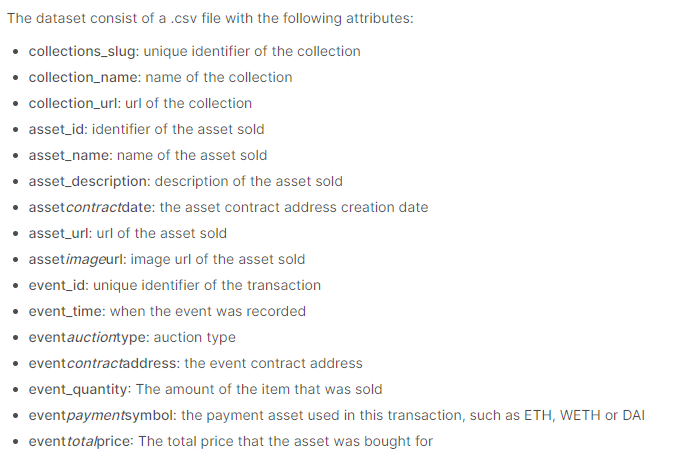

In [11]:
df.head()

,collection_name,collection_url,asset_id,asset_name,asset_contract_date,event_id,event_time,event_contract_address,event_quantity,event_payment_symbol,event_total_price
0,Rarible,https://opensea.io/collection/rarible,18214580,Daft Punk Never Die,2020-05-27 16:53:33,80762268,2021-02-27 23:59:20,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.070000
1,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,Rarebit #164 - Wax Off Bunny,2021-01-21 20:43:08,80762142,2021-02-27 23:58:49,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.150000
2,Rarible,https://opensea.io/collection/rarible,16911700,Meditation,2020-05-27 16:53:33,80762131,2021-02-27 23:58:47,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.001000
3,Rarible,https://opensea.io/collection/rarible,16986936,I´m OG,2020-05-27 16:53:33,80762121,2021-02-27 23:58:46,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.000647
4,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,Celia B100 #105,2019-11-17 21:00:18,80762099,2021-02-27 23:58:44,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,0.200000


In [12]:
# Имеем набор транзакций продаж нфт за февраль месяц
df['event_time'].agg([min, max])

min   2021-02-01 00:04:47
max   2021-02-28 23:59:29
Name: event_time, dtype: datetime64[ns]

In [13]:
df['collection_name'].value_counts()

Sorare                    40679
Rarible                   11756
Hashmasks                  7580
Axie Infinity              5944
CryptoKitties              4768
                          ...  
Art by Robert Rich            1
T R A U M A                   1
Disputationi Locus            1
Whistlegraphs                 1
Mattia Cuttini Produkt        1
Name: collection_name, Length: 1552, dtype: int64

In [14]:
pd.options.display.float_format = '{:20,.2f}'.format

In [15]:
# Больше всего операций было произведено  в ETH, WETH, MANA, DAI
df.groupby('event_payment_symbol')['event_total_price'].agg(['sum', 'count']).reset_index().\
sort_values('count', ascending = False).head(20)

,event_payment_symbol,sum,count
17,ETH,"100,435.57",100024
47,WETH,"10,753.74",6385
26,MANA,"6,679,130.00",455
11,DAI,"220,143.64",273
38,SAND,"1,989,958.19",162
44,USDC,"764,058.92",140
43,UNI,"4,442.04",111
33,PGU,245.00,98
35,RARI,"2,473.34",76
15,ELAND,"3,138,100.00",73


In [16]:
# Наибольшее число транзакций было со следующими 6 токенами
# Для удобства анализа я взял среднюю цену свечи за февраль 2021 года каждого токена
token_exchange_rate = pd.Series( {'ETH' : 2750, 'WETH' : 16150, 'MANA':0.25,
                                     'DAI' : 1, 'SAND': 0.24, 'USDC':1}).to_frame().reset_index().\
                                        rename(columns = {'index' : 'event_payment_symbol', 0 : 'dollars'})
token_exchange_rate

,event_payment_symbol,dollars
0,ETH,"2,750.00"
1,WETH,"16,150.00"
2,MANA,0.25
3,DAI,1.00
4,SAND,0.24
5,USDC,1.00


In [17]:
paid_by_top6_token = df.merge(token_exchange_rate, how = 'inner', on = 'event_payment_symbol')
paid_by_top6_token

,collection_name,collection_url,asset_id,asset_name,asset_contract_date,event_id,event_time,event_contract_address,event_quantity,event_payment_symbol,event_total_price,dollars
0,Rarible,https://opensea.io/collection/rarible,18214580,Daft Punk Never Die,2020-05-27 16:53:33,80762268,2021-02-27 23:59:20,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.07,"2,750.00"
1,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,Rarebit #164 - Wax Off Bunny,2021-01-21 20:43:08,80762142,2021-02-27 23:58:49,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.15,"2,750.00"
2,Rarible,https://opensea.io/collection/rarible,16911700,Meditation,2020-05-27 16:53:33,80762131,2021-02-27 23:58:47,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.00,"2,750.00"
3,Rarible,https://opensea.io/collection/rarible,16986936,I´m OG,2020-05-27 16:53:33,80762121,2021-02-27 23:58:46,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.00,"2,750.00"
4,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,Celia B100 #105,2019-11-17 21:00:18,80762099,2021-02-27 23:58:44,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,0.20,"2,750.00"
...,...,...,...,...,...,...,...,...,...,...,...,...
107434,Meme Ltd.,https://opensea.io/collection/meme-ltd,16964290,Don't F*ck with MEME,2020-08-26 06:38:47,80984386,2021-02-28 14:34:07,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,99.99,1.00
107435,Meme Ltd.,https://opensea.io/collection/meme-ltd,16658998,Don’t buy MEME,2020-08-26 06:38:47,80945856,2021-02-28 11:59:01,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,35.00,1.00
107436,WEIRDOS,https://opensea.io/collection/weirdos,18019354,56. DALLAS WEIRDO #9 of 10,2020-12-02 17:40:53,80905921,2021-02-28 10:00:28,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,50.00,1.00
107437,WEIRDOS,https://opensea.io/collection/weirdos,18020600,60. SCOTT WEIRDO #5 of 10,2020-12-02 17:40:53,80903985,2021-02-28 09:53:26,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,50.00,1.00


In [18]:
paid_by_top6_token['tx_price'] = paid_by_top6_token['event_total_price']*paid_by_top6_token['dollars']
paid_by_top6_token

,collection_name,collection_url,asset_id,asset_name,asset_contract_date,event_id,event_time,event_contract_address,event_quantity,event_payment_symbol,event_total_price,dollars,tx_price
0,Rarible,https://opensea.io/collection/rarible,18214580,Daft Punk Never Die,2020-05-27 16:53:33,80762268,2021-02-27 23:59:20,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.07,"2,750.00",192.50
1,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,Rarebit #164 - Wax Off Bunny,2021-01-21 20:43:08,80762142,2021-02-27 23:58:49,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.15,"2,750.00",412.50
2,Rarible,https://opensea.io/collection/rarible,16911700,Meditation,2020-05-27 16:53:33,80762131,2021-02-27 23:58:47,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.00,"2,750.00",2.75
3,Rarible,https://opensea.io/collection/rarible,16986936,I´m OG,2020-05-27 16:53:33,80762121,2021-02-27 23:58:46,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.00,"2,750.00",1.78
4,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,Celia B100 #105,2019-11-17 21:00:18,80762099,2021-02-27 23:58:44,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,0.20,"2,750.00",550.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107434,Meme Ltd.,https://opensea.io/collection/meme-ltd,16964290,Don't F*ck with MEME,2020-08-26 06:38:47,80984386,2021-02-28 14:34:07,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,99.99,1.00,99.99
107435,Meme Ltd.,https://opensea.io/collection/meme-ltd,16658998,Don’t buy MEME,2020-08-26 06:38:47,80945856,2021-02-28 11:59:01,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,35.00,1.00,35.00
107436,WEIRDOS,https://opensea.io/collection/weirdos,18019354,56. DALLAS WEIRDO #9 of 10,2020-12-02 17:40:53,80905921,2021-02-28 10:00:28,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,50.00,1.00,50.00
107437,WEIRDOS,https://opensea.io/collection/weirdos,18020600,60. SCOTT WEIRDO #5 of 10,2020-12-02 17:40:53,80903985,2021-02-28 09:53:26,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,50.00,1.00,50.00


In [19]:
# чтобы посмотреть динамику продаж по дням необходимо преобразовать дату к нужному формату
paid_by_top6_token['tx_day'] = paid_by_top6_token['event_time'].to_numpy().astype('datetime64[D]')
paid_by_top6_token.head()

,collection_name,collection_url,asset_id,asset_name,asset_contract_date,event_id,event_time,event_contract_address,event_quantity,event_payment_symbol,event_total_price,dollars,tx_price,tx_day
0,Rarible,https://opensea.io/collection/rarible,18214580,Daft Punk Never Die,2020-05-27 16:53:33,80762268,2021-02-27 23:59:20,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.07,"2,750.00",192.50,2021-02-27
1,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,Rarebit #164 - Wax Off Bunny,2021-01-21 20:43:08,80762142,2021-02-27 23:58:49,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.15,"2,750.00",412.50,2021-02-27
2,Rarible,https://opensea.io/collection/rarible,16911700,Meditation,2020-05-27 16:53:33,80762131,2021-02-27 23:58:47,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.00,"2,750.00",2.75,2021-02-27
3,Rarible,https://opensea.io/collection/rarible,16986936,I´m OG,2020-05-27 16:53:33,80762121,2021-02-27 23:58:46,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.00,"2,750.00",1.78,2021-02-27
4,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,Celia B100 #105,2019-11-17 21:00:18,80762099,2021-02-27 23:58:44,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,0.20,"2,750.00",550.00,2021-02-27


In [20]:
day_dynamics = paid_by_top6_token.groupby('tx_day')['tx_price'].agg(['sum', 'count']).reset_index()
day_dynamics['sum'] = day_dynamics['sum'].apply(lambda x: round(x))
day_dynamics

,tx_day,sum,count
0,2021-02-01,5000248,2291
1,2021-02-02,15294682,2819
2,2021-02-03,13095087,2125
3,2021-02-04,14367372,1678
4,2021-02-05,10378711,1516
5,2021-02-06,9202809,2994
6,2021-02-07,7937315,2019
7,2021-02-08,7213187,1543
8,2021-02-09,6465335,1421
9,2021-02-10,6133848,1079


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='tx_day'>

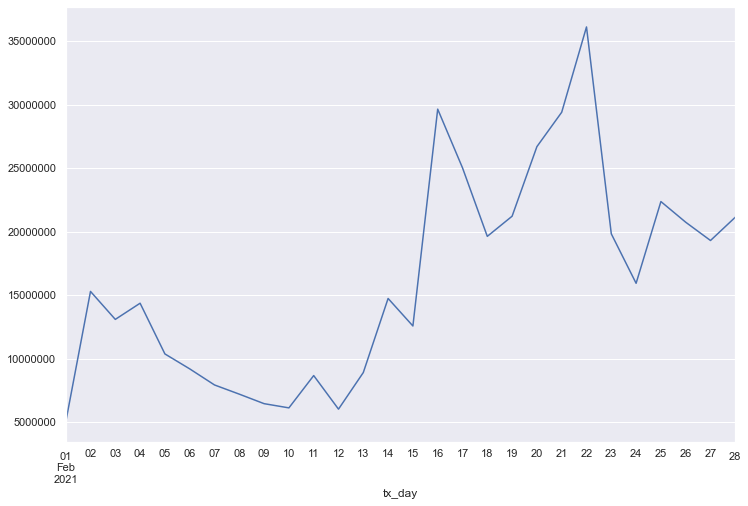

In [22]:
plt.rcParams["axes.formatter.limits"] = (-5, 12)

sns.set(rc={'figure.figsize':(12,8)})
# обьем продаж растет в течении месяца
day_dynamics.set_index('tx_day')['sum'].plot()

<AxesSubplot:xlabel='tx_day'>

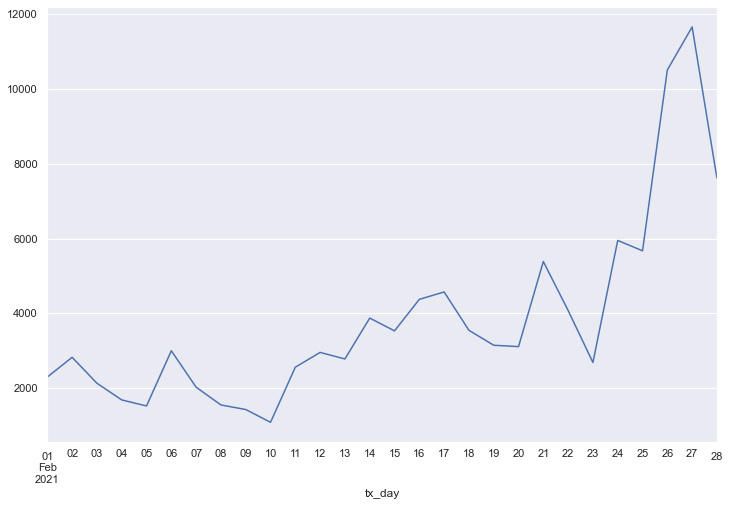

In [23]:
# Количество транзакций возрастает в течении месяца
day_dynamics.set_index('tx_day')['count'].plot()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='count', ylabel='sum'>

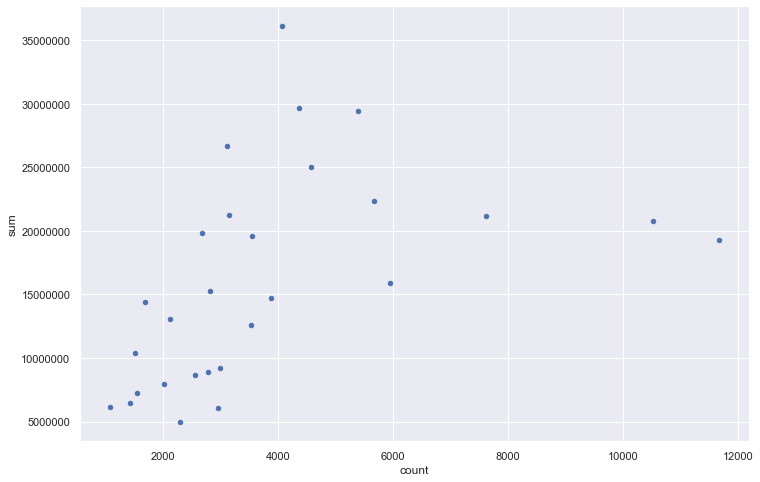

In [24]:
# Заметили линейную связь между количеством транзакций в день и обьемом торговли
day_dynamics.plot.scatter(x = 'count', y = 'sum')

In [25]:
# Посмотрим обусловлено ли это торговлей на бычьем рынке или торговлей лишь несколькими коллекциями
unique_collections_per_day = paid_by_top6_token.groupby('tx_day')['collection_name'].nunique().\
                                reset_index().rename(columns = {'collection_name' : 'unique_collections'})
unique_collections_per_day

,tx_day,unique_collections
0,2021-02-01,118
1,2021-02-02,112
2,2021-02-03,92
3,2021-02-04,85
4,2021-02-05,83
5,2021-02-06,107
6,2021-02-07,112
7,2021-02-08,100
8,2021-02-09,103
9,2021-02-10,114


<AxesSubplot:xlabel='tx_day'>

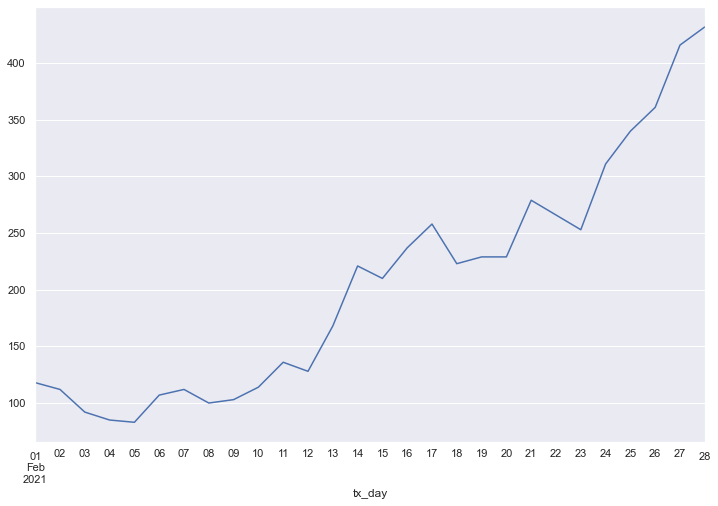

In [26]:
# количество продаж нфт уникальных коллекций значительно выросло в течении месяца
unique_collections_per_day.set_index('tx_day')['unique_collections'].plot()

In [27]:
paid_by_top6_token

,collection_name,collection_url,asset_id,asset_name,asset_contract_date,event_id,event_time,event_contract_address,event_quantity,event_payment_symbol,event_total_price,dollars,tx_price,tx_day
0,Rarible,https://opensea.io/collection/rarible,18214580,Daft Punk Never Die,2020-05-27 16:53:33,80762268,2021-02-27 23:59:20,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.07,"2,750.00",192.50,2021-02-27
1,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,Rarebit #164 - Wax Off Bunny,2021-01-21 20:43:08,80762142,2021-02-27 23:58:49,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.15,"2,750.00",412.50,2021-02-27
2,Rarible,https://opensea.io/collection/rarible,16911700,Meditation,2020-05-27 16:53:33,80762131,2021-02-27 23:58:47,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.00,"2,750.00",2.75,2021-02-27
3,Rarible,https://opensea.io/collection/rarible,16986936,I´m OG,2020-05-27 16:53:33,80762121,2021-02-27 23:58:46,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,0.00,"2,750.00",1.78,2021-02-27
4,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,Celia B100 #105,2019-11-17 21:00:18,80762099,2021-02-27 23:58:44,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,0.20,"2,750.00",550.00,2021-02-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107434,Meme Ltd.,https://opensea.io/collection/meme-ltd,16964290,Don't F*ck with MEME,2020-08-26 06:38:47,80984386,2021-02-28 14:34:07,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,99.99,1.00,99.99,2021-02-28
107435,Meme Ltd.,https://opensea.io/collection/meme-ltd,16658998,Don’t buy MEME,2020-08-26 06:38:47,80945856,2021-02-28 11:59:01,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,35.00,1.00,35.00,2021-02-28
107436,WEIRDOS,https://opensea.io/collection/weirdos,18019354,56. DALLAS WEIRDO #9 of 10,2020-12-02 17:40:53,80905921,2021-02-28 10:00:28,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,50.00,1.00,50.00,2021-02-28
107437,WEIRDOS,https://opensea.io/collection/weirdos,18020600,60. SCOTT WEIRDO #5 of 10,2020-12-02 17:40:53,80903985,2021-02-28 09:53:26,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,50.00,1.00,50.00,2021-02-28


In [28]:
# asset_contract_date не является датой минта нфт либо время трекалось через определенный период
paid_by_top6_token.groupby('collection_name')['asset_contract_date'].agg(['min', 'max', 'count', 'nunique']).\
                        reset_index().rename(columns = {'count':'mint_number'}).\
                        sort_values('mint_number', ascending = False)

,collection_name,min,max,mint_number,nunique
1198,Sorare,2019-07-04 10:01:29,2019-07-04 10:01:29,40679,1
1114,Rarible,2020-01-01 13:22:58,2020-05-27 17:06:50,11695,3
701,Hashmasks,2021-01-28 10:22:02,2021-01-28 10:22:02,7580,1
125,Axie Infinity,2018-04-16 05:57:45,2018-04-16 05:57:45,5943,1
388,CryptoKitties,2018-01-23 04:51:39,2018-01-23 04:51:39,4765,1
...,...,...,...,...,...
743,JWolff Collection,2021-02-26 16:49:14,2021-02-26 16:49:14,1,1
744,Jakub Spacek,2020-12-29 07:24:27,2020-12-29 07:24:27,1,1
745,Japanese Bath by Dubwoman AKA Giovanna Sun,2020-12-02 17:40:53,2020-12-02 17:40:53,1,1
747,Joe Diehl,2020-12-02 17:40:53,2020-12-02 17:40:53,1,1


In [29]:
# Удалим лишние столбцы
paid_by_top6_token.drop(['asset_contract_date', 'asset_name', 'event_total_price'], axis = 1, inplace = True)
paid_by_top6_token

,collection_name,collection_url,asset_id,event_id,event_time,event_contract_address,event_quantity,event_payment_symbol,dollars,tx_price,tx_day
0,Rarible,https://opensea.io/collection/rarible,18214580,80762268,2021-02-27 23:59:20,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,"2,750.00",192.50,2021-02-27
1,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,80762142,2021-02-27 23:58:49,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,"2,750.00",412.50,2021-02-27
2,Rarible,https://opensea.io/collection/rarible,16911700,80762131,2021-02-27 23:58:47,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,"2,750.00",2.75,2021-02-27
3,Rarible,https://opensea.io/collection/rarible,16986936,80762121,2021-02-27 23:58:46,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,"2,750.00",1.78,2021-02-27
4,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,80762099,2021-02-27 23:58:44,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,"2,750.00",550.00,2021-02-27
...,...,...,...,...,...,...,...,...,...,...,...
107434,Meme Ltd.,https://opensea.io/collection/meme-ltd,16964290,80984386,2021-02-28 14:34:07,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,1.00,99.99,2021-02-28
107435,Meme Ltd.,https://opensea.io/collection/meme-ltd,16658998,80945856,2021-02-28 11:59:01,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,1.00,35.00,2021-02-28
107436,WEIRDOS,https://opensea.io/collection/weirdos,18019354,80905921,2021-02-28 10:00:28,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,1.00,50.00,2021-02-28
107437,WEIRDOS,https://opensea.io/collection/weirdos,18020600,80903985,2021-02-28 09:53:26,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,DAI,1.00,50.00,2021-02-28


In [30]:
# event_contract_address - адрес контракта коллекции, но есть некоторые коллекции у которых несколько контрактов
# возможно это были скам коллекции, посмотрим на эти коллекции поближе
collection_contract_address = paid_by_top6_token.groupby('collection_name')['event_contract_address'].agg(['nunique']).\
                    reset_index().sort_values('nunique')
collection_contract_address

,collection_name,nunique
0,#HashTrends,1
993,Organic Crypto,1
992,Order of the Black Rose V2,1
991,OptionRoom Genesis,1
990,One Tribe In Space,1
...,...,...
675,Gods Unchained Collectibles,3
1299,The Sandbox,3
784,KnownOrigin,3
1238,SuperRare,4


In [31]:
# 1.5% адресоа контракта коллекции отличались от истинного
paid_by_top6_token[paid_by_top6_token['collection_name'] == 'The Sandbox'].\
groupby(['collection_name','event_contract_address'])['event_id'].\
agg('count').reset_index().rename(columns = {'event_id' : 'tx_number'})

,collection_name,event_contract_address,tx_number
0,The Sandbox,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,4
1,The Sandbox,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,608
2,The Sandbox,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,6


In [32]:
# При том что url коллекции всегда был одинаковым, адреса имеем разные
paid_by_top6_token[paid_by_top6_token['collection_name'] == 'The Sandbox'].\
groupby(['collection_name','collection_url'])['event_id'].\
agg('count').reset_index().rename(columns = {'event_id' : 'tx_number'})

,collection_name,collection_url,tx_number
0,The Sandbox,https://opensea.io/collection/sandbox,618


In [33]:
# Посмотрим на транзакции связанные с этим адресом
# Видим что у этого адреса несколько коллекций
paid_by_top6_token[paid_by_top6_token['event_contract_address'] == '0x7a6425c9b3f5521bfa5d71df710a2fb80508319b']

,collection_name,collection_url,asset_id,event_id,event_time,event_contract_address,event_quantity,event_payment_symbol,dollars,tx_price,tx_day
1749,Brave Frontier Heroes,https://opensea.io/collection/brave-frontier-h...,17384505,80700481,2021-02-27 19:49:03,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",2.48,2021-02-27
3460,Eggrypto,https://opensea.io/collection/eggryptomonster,18259405,80657559,2021-02-27 15:54:43,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",816.75,2021-02-27
4129,The Sandbox,https://opensea.io/collection/sandbox,17212732,80633740,2021-02-27 14:10:35,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",750.75,2021-02-27
9371,Eggrypto,https://opensea.io/collection/eggryptomonster,15986224,80533278,2021-02-27 03:47:46,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",193.05,2021-02-27
9546,Eggrypto,https://opensea.io/collection/eggryptomonster,17333556,80531193,2021-02-27 03:31:15,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",39.60,2021-02-27
10878,Eggrypto,https://opensea.io/collection/eggryptomonster,16793105,80510757,2021-02-27 00:56:03,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",37.12,2021-02-27
20630,Brave Frontier Heroes,https://opensea.io/collection/brave-frontier-h...,17340621,80298377,2021-02-26 05:34:13,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",74.25,2021-02-26
20799,Brave Frontier Heroes,https://opensea.io/collection/brave-frontier-h...,16372992,80286471,2021-02-26 04:33:28,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",49.50,2021-02-26
20960,Brave Frontier Heroes,https://opensea.io/collection/brave-frontier-h...,17760661,80273807,2021-02-26 03:10:25,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",61.88,2021-02-26
25574,The Sandbox,https://opensea.io/collection/sandbox,16526917,80023515,2021-02-25 03:11:25,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",402.19,2021-02-25


In [34]:
# посмотрим на транзакции этого адреса в sandbox
suspect_adress_sandbox = paid_by_top6_token[(paid_by_top6_token['collection_name']=='The Sandbox')&\
        (paid_by_top6_token['event_contract_address'] == '0x7a6425c9b3f5521bfa5d71df710a2fb80508319b')]
suspect_adress_sandbox

,collection_name,collection_url,asset_id,event_id,event_time,event_contract_address,event_quantity,event_payment_symbol,dollars,tx_price,tx_day
4129,The Sandbox,https://opensea.io/collection/sandbox,17212732,80633740,2021-02-27 14:10:35,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",750.75,2021-02-27
25574,The Sandbox,https://opensea.io/collection/sandbox,16526917,80023515,2021-02-25 03:11:25,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",402.19,2021-02-25
81929,The Sandbox,https://opensea.io/collection/sandbox,17214120,77609937,2021-02-06 12:32:46,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",268.12,2021-02-06
82053,The Sandbox,https://opensea.io/collection/sandbox,17214209,77608900,2021-02-06 11:34:26,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,1,ETH,"2,750.00",268.12,2021-02-06


In [35]:
suspect_adress_sandbox['tx_price'].mean()

422.296875

In [36]:
paid_by_top6_token[paid_by_top6_token['collection_name']=='The Sandbox']

,collection_name,collection_url,asset_id,event_id,event_time,event_contract_address,event_quantity,event_payment_symbol,dollars,tx_price,tx_day
53,The Sandbox,https://opensea.io/collection/sandbox,17211620,80760619,2021-02-27 23:53:34,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,"2,750.00",825.00,2021-02-27
427,The Sandbox,https://opensea.io/collection/sandbox,17041931,80744674,2021-02-27 22:58:35,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,"2,750.00",822.25,2021-02-27
1316,The Sandbox,https://opensea.io/collection/sandbox,16655425,80714638,2021-02-27 20:58:08,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,"2,750.00",715.00,2021-02-27
1506,The Sandbox,https://opensea.io/collection/sandbox,16658081,80706730,2021-02-27 20:24:03,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,"2,750.00",660.00,2021-02-27
2000,The Sandbox,https://opensea.io/collection/sandbox,17215207,80694269,2021-02-27 19:07:49,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,"2,750.00",825.00,2021-02-27
...,...,...,...,...,...,...,...,...,...,...,...
106560,The Sandbox,https://opensea.io/collection/sandbox,15829398,77582141,2021-02-05 14:13:04,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,SAND,0.24,799.92,2021-02-05
106561,The Sandbox,https://opensea.io/collection/sandbox,17038667,77566059,2021-02-04 22:47:16,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,SAND,0.24,"1,199.76",2021-02-04
106568,The Sandbox,https://opensea.io/collection/sandbox,18216882,80915705,2021-02-28 10:32:37,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,SAND,0.24,528.00,2021-02-28
106569,The Sandbox,https://opensea.io/collection/sandbox,18216032,80813815,2021-02-28 03:17:54,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,SAND,0.24,"1,199.76",2021-02-28


In [37]:
paid_by_top6_token[paid_by_top6_token['collection_name']=='The Sandbox']['tx_price'].mean()

1446.1218141861018

In [38]:
# 156 из 1533 коллекций имеют больше одного адреса
more_adresses = collection_contract_address[collection_contract_address['nunique'] > 1]
more_adresses

,collection_name,nunique
1102,ROBNESS PRINTS,2
1128,Ringers by Dmitri Cherniak,2
721,Infinite Loop,2
1472,freestyle,2
388,CryptoKitties,2
...,...,...
675,Gods Unchained Collectibles,3
1299,The Sandbox,3
784,KnownOrigin,3
1238,SuperRare,4


In [39]:
# Посмторим пересечения адресов проектов со всеми транзакциями адреса, что смотрели выше 0x7a6425c9b3f5521bfa5d71df710a2fb80508319b
# Один и тот же адрес использовался для скама на нескольких коллекциях
collection_contract_address[collection_contract_address['nunique'] > 1].\
merge(paid_by_top6_token[paid_by_top6_token['event_contract_address'] == '0x7a6425c9b3f5521bfa5d71df710a2fb80508319b'],
                on = 'collection_name', how = 'inner' )['collection_name'].value_counts()

Brave Frontier Heroes    18
The Sandbox               4
CryptoSpells              3
MyCryptoHeroes            3
Name: collection_name, dtype: int64

In [40]:
paid_by_top6_token[paid_by_top6_token['collection_name'] == 'Brave Frontier Heroes'].\
groupby(['collection_name','event_contract_address'])['event_id'].\
agg('count').reset_index().rename(columns = {'event_id' : 'tx_number'})

,collection_name,event_contract_address,tx_number
0,Brave Frontier Heroes,0x7a6425c9b3f5521bfa5d71df710a2fb80508319b,18
1,Brave Frontier Heroes,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,17


In [41]:
more_adresses.merge(paid_by_top6_token, on = 'collection_name', how = 'left')\
            [['collection_name', 'event_contract_address', 'event_id']]

,collection_name,event_contract_address,event_id
0,ROBNESS PRINTS,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,79983074
1,ROBNESS PRINTS,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,79845294
2,ROBNESS PRINTS,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,77796027
3,ROBNESS PRINTS,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,77435209
4,Ringers by Dmitri Cherniak,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,80722261
...,...,...,...
89505,MakersPlace,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,78178292
89506,MakersPlace,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,77879417
89507,MakersPlace,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,77470792
89508,MakersPlace,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,77466151


In [42]:
pd.options.display.max_rows = 500

In [43]:
# Нашли более сотни подозрительных адресов
# Некоторые непопулярные коллекции в целом могли быть скамом и имели малое кличество транзакций
# в то время как на более популярных коллекиях явно виден дисбаланс между транзакциями по адресам
# возможно эти адреса были использованы для скама пользователей лаунчпада, их желательно изучать более детально
more_adresses.merge(paid_by_top6_token, on = 'collection_name', how = 'left')\
            [['collection_name', 'event_contract_address', 'event_id']].\
groupby(['collection_name','event_contract_address'])['event_id'].\
agg('count').reset_index().rename(columns = {'event_id' : 'tx_number'})

,collection_name,event_contract_address,tx_number
0,Alpaca City,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,60
1,Alpaca City,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,3
2,American Gods,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,17
3,American Gods,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,10
4,AnRKey X,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,4
5,AnRKey X,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1
6,ApeIn.Finance Shop,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,111
7,ApeIn.Finance Shop,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,483
8,Archetype by Kjetil Golid,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,146
9,Archetype by Kjetil Golid,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1


In [44]:
paid_by_top6_token.head()

,collection_name,collection_url,asset_id,event_id,event_time,event_contract_address,event_quantity,event_payment_symbol,dollars,tx_price,tx_day
0,Rarible,https://opensea.io/collection/rarible,18214580,80762268,2021-02-27 23:59:20,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,"2,750.00",192.50,2021-02-27
1,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,80762142,2021-02-27 23:58:49,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,"2,750.00",412.50,2021-02-27
2,Rarible,https://opensea.io/collection/rarible,16911700,80762131,2021-02-27 23:58:47,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,"2,750.00",2.75,2021-02-27
3,Rarible,https://opensea.io/collection/rarible,16986936,80762121,2021-02-27 23:58:46,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1,ETH,"2,750.00",1.78,2021-02-27
4,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,80762099,2021-02-27 23:58:44,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1,ETH,"2,750.00",550.00,2021-02-27


In [45]:
# Посмотрим на статистику продаж nft за данный месяц
nft_month_statistics = paid_by_top6_token.groupby('collection_name')[ 'tx_price'].\
            agg(['sum', 'mean', 'median', 'count', 'min', 'max']).reset_index()
nft_month_statistics

,collection_name,sum,mean,median,count,min,max
0,#HashTrends,"1,615.00","1,615.00","1,615.00",1,"1,615.00","1,615.00"
1,$2019STUFF$,5.50,1.83,0.00,3,0.00,5.50
2,$2020STUFF$,68.75,22.92,0.00,3,0.00,68.75
3,$2021STUFF$,0.00,0.00,0.00,1,0.00,0.00
4,$VN,9.62,0.69,0.00,14,0.00,3.30
...,...,...,...,...,...,...,...
1528,waSka,9.35,9.35,9.35,1,9.35,9.35
1529,wassiePunks,"1,615.00","1,615.00","1,615.00",1,"1,615.00","1,615.00"
1530,wen see token,0.28,0.28,0.28,1,0.28,0.28
1531,yuhlets,412.50,412.50,412.50,1,412.50,412.50


In [46]:
# топ 10 коллекий по обьему торгов за февраль 2021г
nft_month_statistics.sort_values('sum', ascending = False).head(10)

,collection_name,sum,mean,median,count,min,max
400,CryptoPunks,"119,317,129.66","57,613.29","44,000.00",2071,0.00,"2,200,000.00"
701,Hashmasks,"116,122,907.59","15,319.64","5,498.62",7580,0.00,"2,422,500.00"
557,EllioTrades NFT Collection,"23,507,024.28","20,143.12","8,075.00",1167,"2,612.50","1,049,750.00"
1114,Rarible,"22,268,401.80","1,904.10",275.00,11695,0.00,"484,500.00"
926,NFP,"18,638,883.64","305,555.47","209,950.00",61,"24,750.00","1,780,537.50"
1198,Sorare,"16,938,080.24",416.38,112.75,40679,0.00,"161,062.00"
1238,SuperRare,"13,627,733.70","8,396.63","3,395.06",1623,66.00,"272,250.00"
207,Bullrun Babes,"11,072,505.36","12,022.26","1,760.00",921,0.59,"726,750.00"
1178,ShakR Art,"7,083,450.00","214,650.00","219,972.50",33,"139,287.50","244,200.00"
121,Autoglyphs,"5,462,936.86","176,223.77","104,500.00",31,"38,500.00","1,130,500.00"


In [47]:
# топ 10 популярных коллекций за февраль 2021г
nft_month_statistics.sort_values('count', ascending = False).head(10)

,collection_name,sum,mean,median,count,min,max
1198,Sorare,"16,938,080.24",416.38,112.75,40679,0.00,"161,062.00"
1114,Rarible,"22,268,401.80","1,904.10",275.00,11695,0.00,"484,500.00"
701,Hashmasks,"116,122,907.59","15,319.64","5,498.62",7580,0.00,"2,422,500.00"
125,Axie Infinity,"2,762,614.41",464.85,192.50,5943,2.75,"78,375.00"
388,CryptoKitties,"1,290,187.01",270.76,24.75,4765,0.07,"137,500.00"
400,CryptoPunks,"119,317,129.66","57,613.29","44,000.00",2071,0.00,"2,200,000.00"
168,Beeple: All Hail The King,"913,797.12",501.26,275.00,1823,16.15,"27,500.00"
1238,SuperRare,"13,627,733.70","8,396.63","3,395.06",1623,66.00,"272,250.00"
843,MakersPlace,"3,357,142.81","2,416.95","1,100.00",1389,0.00,"83,490.00"
251,ChainFaces,"1,103,313.22",936.60,412.50,1178,13.88,"68,750.00"


In [48]:
# топ 10 продаж нфт за месяц
paid_by_top6_token.sort_values('tx_price', ascending = False)\
            [['collection_name', 'tx_day', 'tx_price']].head(10)

,collection_name,tx_day,tx_price
100505,Hashmasks,2021-02-26,"2,422,500.00"
47914,CryptoPunks,2021-02-19,"2,200,000.00"
50813,CryptoPunks,2021-02-18,"1,787,500.00"
101724,NFP,2021-02-20,"1,780,537.50"
38563,CryptoPunks,2021-02-22,"1,512,500.00"
105612,Hashmasks,2021-02-04,"1,453,500.00"
105292,Meme Ltd.,2021-02-06,"1,434,120.00"
105859,Hashmasks,2021-02-03,"1,292,000.00"
100439,Pascal Boyart,2021-02-26,"1,211,250.00"
104622,Hashmasks,2021-02-10,"1,211,250.00"


In [49]:
# коллекции которые больше остальных выросли/упали за месяц
mean_sales_ms = paid_by_top6_token[paid_by_top6_token['tx_day'] == '2021-02-1']\
        .groupby('collection_name')['tx_price'].mean().to_frame().reset_index().\
        rename(columns = {'tx_price' : 'ms_price'})
print(len(mean_sales_ms))
mean_sales_ms

118


,collection_name,ms_price
0,-NT-NightThoughts,110.00
1,0xmons,"1,375.00"
2,APY VISION NFT 2021,"7,425.00"
3,Algorithmic Art,4.12
4,Alpaca City,13.75
5,Antonio Brigante,106.59
6,Async Art,"2,642.75"
7,Automaton,343.75
8,Avastars,632.50
9,Axie Infinity,248.29


In [50]:
# Посмотрим как изменились продажи коллекций за месяц
# Найдем процентное соотношение между средней ценой продаж за последний день месяца и первый
# Отсортируем и посмотрим на самые успешные коллекции и те, которые показали себя не очень
mean_sales_me = paid_by_top6_token[paid_by_top6_token['tx_day'] == '2021-02-28']\
        .groupby('collection_name')['tx_price'].mean().to_frame().reset_index().\
        rename(columns = {'tx_price' : 'me_price'})
print(len(mean_sales_me))
mean_sales_me

432


,collection_name,me_price
0,$VN,1.43
1,- Cryptocircuits -,171.88
2,0xBitcoin Memes,8.25
3,1/1 Animations,"1,535.00"
4,10x10 Xs by AltJames,412.50
5,27-Bit Digital by kai,"7,425.25"
6,3D Moods,357.50
7,680pxl,"2,903.75"
8,99 Guitar Pics,357.50
9,A Night On The Dunes,"4,845.00"


In [51]:
diff = mean_sales_ms.merge(mean_sales_me,on = 'collection_name', how = 'left')
diff.fillna(0, inplace=True)
diff

,collection_name,ms_price,me_price
0,-NT-NightThoughts,110.00,0.00
1,0xmons,"1,375.00",0.00
2,APY VISION NFT 2021,"7,425.00",0.00
3,Algorithmic Art,4.12,3.68
4,Alpaca City,13.75,44.20
5,Antonio Brigante,106.59,0.00
6,Async Art,"2,642.75","2,103.75"
7,Automaton,343.75,0.00
8,Avastars,632.50,"1,478.74"
9,Axie Infinity,248.29,340.16


In [52]:
# 2 коллекции показали рост за месяц более чем на 17.000 %
diff['pct_diff'] = ((diff['me_price'] - diff['ms_price']) / diff['ms_price'])*100
diff.sort_values('pct_diff', ascending = False)

,collection_name,ms_price,me_price,pct_diff
48,Flowerpatch,0.15,27.50,"18,233.33"
72,NFTLootBox.com,412.50,"71,221.50","17,165.82"
92,Singularity by Hideki Tsukamoto,797.50,"20,095.62","2,419.83"
50,Fuck Wall Street,412.50,"8,937.50","2,066.67"
41,ENS: Ethereum Name Service,"2,304.75","30,507.50","1,223.68"
111,Unigrids by Zeblocks,550.00,"6,966.67","1,166.67"
90,Ringers by Dmitri Cherniak,"2,700.07","29,190.18",981.09
110,Twerky Club,68.75,717.45,943.56
115,hawnter99,0.28,2.75,900.00
16,Construction Token by Jeff Davis,907.50,"5,014.17",452.53


In [53]:
# Сджойним нашу предыдущую таблицу со полной статистикой 
# чтобы посмотреть вызван ли наш рост за месяц случайной продажей в конце февраля
diff.merge(nft_month_statistics, on = 'collection_name', how = 'left').sort_values('pct_diff', ascending = False)

,collection_name,ms_price,me_price,pct_diff,sum,mean,median,count,min,max
48,Flowerpatch,0.15,27.50,"18,233.33","36,610.78","4,067.86",55.00,9,0.15,"16,150.00"
72,NFTLootBox.com,412.50,"71,221.50","17,165.82","121,962.25","6,098.11",840.25,20,27.50,"71,221.50"
92,Singularity by Hideki Tsukamoto,797.50,"20,095.62","2,419.83","1,223,535.62","6,578.15","3,437.50",186,594.01,"96,250.00"
50,Fuck Wall Street,412.50,"8,937.50","2,066.67","14,850.00","4,950.00","5,500.00",3,412.50,"8,937.50"
41,ENS: Ethereum Name Service,"2,304.75","30,507.50","1,223.68","703,332.93","5,368.95",687.50,131,2.75,"68,750.00"
111,Unigrids by Zeblocks,550.00,"6,966.67","1,166.67","372,654.50","3,726.55","1,993.75",100,550.00,"30,685.00"
90,Ringers by Dmitri Cherniak,"2,700.07","29,190.18",981.09,"3,377,672.93","11,038.15","4,537.50",306,412.50,"177,650.00"
110,Twerky Club,68.75,717.45,943.56,"1,184,559.99","1,967.71",770.00,602,68.75,"112,113.30"
115,hawnter99,0.28,2.75,900.00,6.60,1.10,0.28,6,0.28,2.75
16,Construction Token by Jeff Davis,907.50,"5,014.17",452.53,"254,329.01","1,829.71","1,031.25",139,550.00,"12,112.50"
